In [2]:
#Import modules
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
#Input file
INPUT_FILE = 'label-modularity.csv'
dataframe = pd.read_csv(INPUT_FILE, header = 0)

In [6]:
#Print the dataframe
dataframe

,label,modularity_class
0,Josh Marks,0
1,Blue Ribbon Restaurants,0
2,Pat Neely,0
3,La Griglia,3
4,Jose Garces,0
...,...,...
615,Jumia Food,4
616,Luke Thomas,0
617,Clodagh McKenna,0
618,Chef Michelle Bernstein,0


In [37]:
#Understand different labels and try to catrgorize them
groupedDataframe = dataframe.groupby(['modularity_class'])
for key, item in groupedDataframe:
    print(groupedDataframe.get_group(key), "\n\n")

                       label  modularity_class
0                 Josh Marks                 0
1    Blue Ribbon Restaurants                 0
2                  Pat Neely                 0
4                Jose Garces                 0
5                   Zac Kara                 0
..                       ...               ...
614    Chef Damaris Phillips                 0
616              Luke Thomas                 0
617          Clodagh McKenna                 0
618  Chef Michelle Bernstein                 0
619               SORTEDfood                 0

[376 rows x 2 columns] 


                         label  modularity_class
11            Taco Bell Cyprus                 1
28        Taco Bell Costa Rica                 1
60               Boston Market                 1
122           Taco Bell Panama                 1
123  Pollo Campero El Salvador                 1
161           Taco Bell Kuwait                 1
193            Taco Bell India                 1
242              

In [40]:
#Count of each modularity class
modularityClassGrouped = dataframe.groupby('modularity_class').modularity_class.count()
modularityClassGrouped

modularity_class
0    376
1     17
2    115
3     23
4     89
Name: modularity_class, dtype: int64

In [77]:
#Prepare a dataframe for plotting
x = ['Celebrity Chef', 'Restaurant 1', 'Restaurant 2', 'Restaurant 3', 'Restaurant 4']
y = [376, 115, 89, 23, 17]
modularityCount = pd.DataFrame({'Community Type' : x, 'Frequency': y})
modularityCount

,Community Type,Frequency
0,Celebrity Chef,376
1,Restaurant 1,115
2,Restaurant 2,89
3,Restaurant 3,23
4,Restaurant 4,17


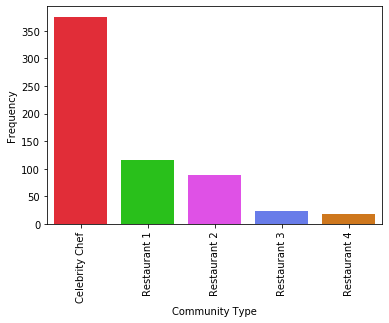

In [79]:
#Plot community and frequency
categoryColors = ["#ff0f1e", "#12db00", "#f538ff", "#526dff","#eb7800"]
sns.barplot(data = modularityCount, x= 'Community Type', y= 'Frequency', palette = categoryColors)
plt.xticks(rotation=90)
plt.show()

In [94]:
#Read label degree csv
labelDegree = pd.read_csv("label-degree.csv", header = 0).sort_values(by='degree', ascending=False)
labelDegree

,label,degree
2,Chef Daniel Boulud,10
8,Logan Junior Chef,10
9,Eric Ripert,10
10,David Chang,10
1,Rene Redzepi,9
0,Alex Guarnaschelli,8
5,Scott Conant,8
6,Robin Miller,8
7,Chef Kent Graham,7
4,Tom Colicchio,6


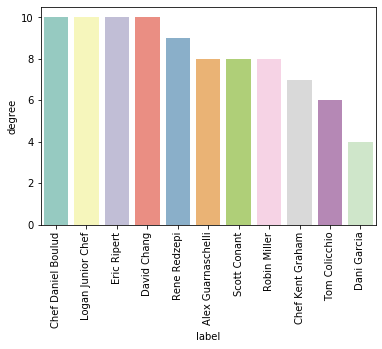

In [95]:
#Plot label and degree
sns.barplot(data = labelDegree, x= 'label', y= 'degree', palette = 'Set3')
plt.xticks(rotation=90)
plt.show()

In [4]:
#Read label and all different stat measures
labelAllStatsMeasure = pd.read_csv("label-all-stat-measures.csv", header = 0)
labelAllStatsMeasure

,label,eccentricity,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality,weighted degree,pageranks,clustering,triangles,eigencentrality
0,Alex Guarnaschelli,2.0,0.833333,0.90,0.285714,8.0,0.085514,0.928571,26,0.879440
1,Rene Redzepi,2.0,0.909091,0.95,1.535714,9.0,0.096208,0.805556,29,0.929288
2,Chef Daniel Boulud,1.0,1.000000,1.00,2.369048,10.0,0.105913,0.755556,34,1.000000
3,Dani Garcia,2.0,0.625000,0.70,0.000000,4.0,0.049523,1.000000,6,0.466818
4,Tom Colicchio,2.0,0.714286,0.80,0.285714,6.0,0.067189,0.866667,13,0.664746
5,Scott Conant,2.0,0.833333,0.90,0.285714,8.0,0.085514,0.928571,26,0.879440
6,Robin Miller,2.0,0.833333,0.90,0.500000,8.0,0.085621,0.892857,25,0.869912
7,Chef Kent Graham,2.0,0.769231,0.85,0.500000,7.0,0.077490,0.857143,18,0.754586
8,Logan Junior Chef,2.0,0.833333,0.90,0.500000,9.0,0.094804,0.833333,30,0.973133
9,Eric Ripert,1.0,1.000000,1.00,2.369048,10.0,0.105913,0.755556,34,1.000000


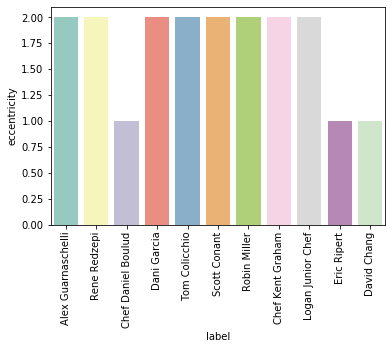

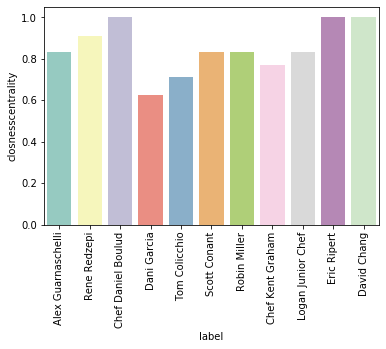

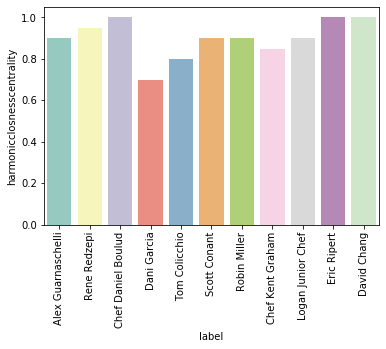

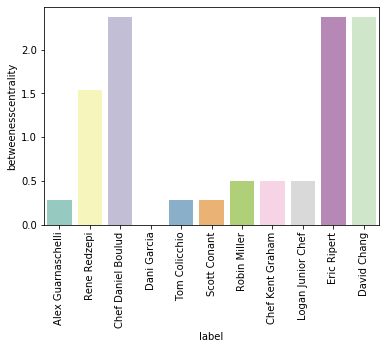

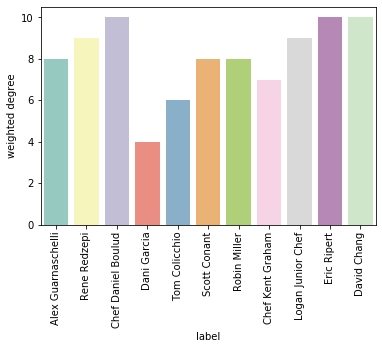

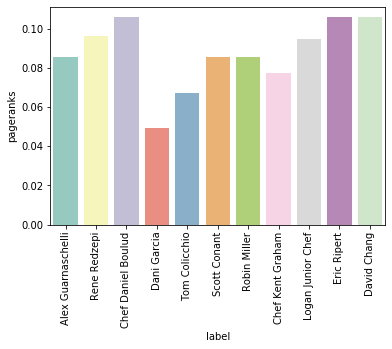

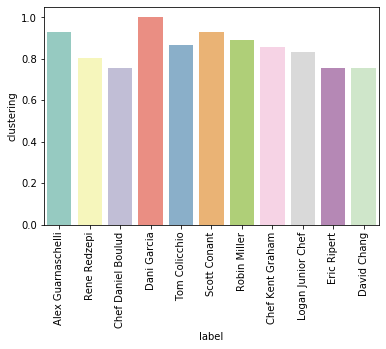

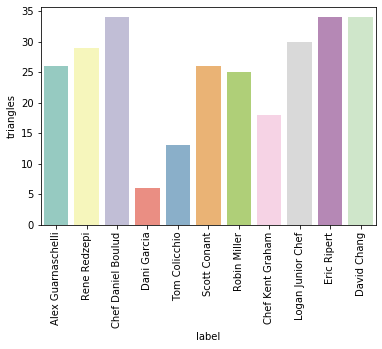

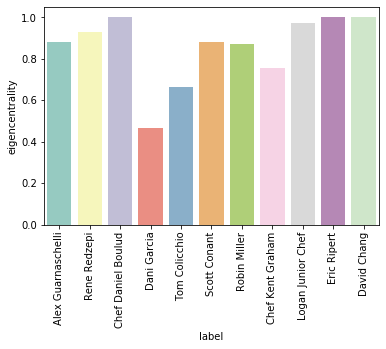

In [10]:
#Plot all different measures
measures = ['eccentricity', 'closnesscentrality', 'harmonicclosnesscentrality', 'betweenesscentrality', 'weighted degree', 'pageranks', 'clustering', 'triangles', 'eigencentrality']
for measure in measures:
    sns.barplot(data = labelAllStatsMeasure, x= 'label', y=  measure, palette = 'Set3')
    plt.xticks(rotation = 90)
    plt.show()